In [3]:
# Import the TensorFlow library for machine learning tasks
import tensorflow as tf  # Import TensorFlow, often abbreviated as tf

# Import specific modules for building and working with neural networks
from tensorflow import keras  # Import the Keras API for model construction
from tensorflow.keras import Sequential  # Import the Sequential model class
from tensorflow.keras.layers import Dense, Flatten  # Import layers for dense and convolutional networks


In [4]:
# Load the MNIST handwritten digit dataset from Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()  # Load training and testing data


11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

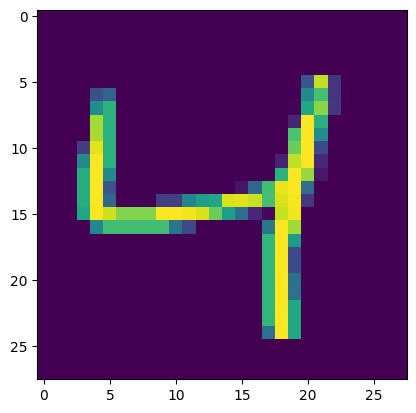

In [7]:
# Import the matplotlib library for plotting and visualization
import matplotlib.pyplot as plt

# Display an image from the training data to visualize its content
plt.imshow(X_train[2])  # Show the 3rd image in the training set


In [8]:
# Normalize pixel values to the range of 0 to 1 for better model performance
X_train = X_train / 255.0  # Rescale pixel values to 0-1 range for training data
X_test = X_test / 255.0  # Rescale pixel values to 0-1 range for testing data


In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Create a sequential neural network model
model = Sequential()  # Create an empty model to add layers to

# Flatten the 2D image data into a 1D vector for processing
model.add(Flatten(input_shape=(28, 28)))  # Flatten 28x28 images into 784-element vectors

# Add the first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons and ReLU activation

# Add the second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons and ReLU activation

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))  # Output layer for 10-class classification with softmax


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Configure the model for training with specific loss function, optimizer, and metrics
model.compile(loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
              optimizer='Adam',  # Efficient optimization algorithm for training
              metrics=['accuracy'])  # Track accuracy during training and evaluation


In [13]:
# Train the model on the training data, tracking progress and validating performance
history = model.fit(X_train,  # Training data
                     y_train,  # True labels for training data
                     epochs=25,  # Iterate over the entire dataset 25 times
                     validation_split=0.2)  # Use 20% of training data for validation


Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2757 - accuracy: 0.9202 - val_loss: 0.1462 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1196 - accuracy: 0.9647 - val_loss: 0.1156 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.1250 - val_accuracy: 0.9643
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0622 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9690
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.1013 - val_accuracy: 0.9703
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.0927 - val_accuracy: 0.9735
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0908 - val_accuracy:

In [14]:

# Generate probability scores for each test image belonging to each digit class
y_prob = model.predict(X_test)  # Predict probabilities for each class in the testing data


313/313 [==============================] - 1s 2ms/step


In [15]:
# Convert probability scores to predicted class labels (0 to 9)
y_pred = y_prob.argmax(axis=1)  # Get the index of the highest probability, representing the predicted class


In [16]:

# Import the accuracy_score function to evaluate model performance
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy of the model's predictions on the testing data
accuracy = accuracy_score(y_test, y_pred)  # Compare true labels with predicted labels
print("Accuracy:", accuracy)  # Display the accuracy score


Accuracy: 0.9774


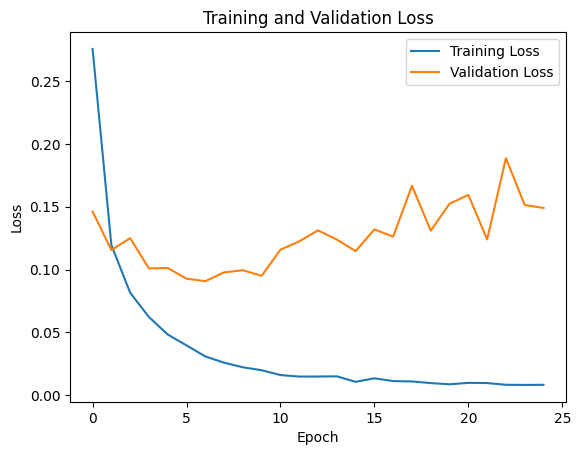

In [17]:

# Plot the training and validation loss over epochs to visualize learning progress
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.title('Training and Validation Loss')  # Add a title to the plot
plt.legend()  # Display the legend to distinguish lines
plt.show()  # Show the plot


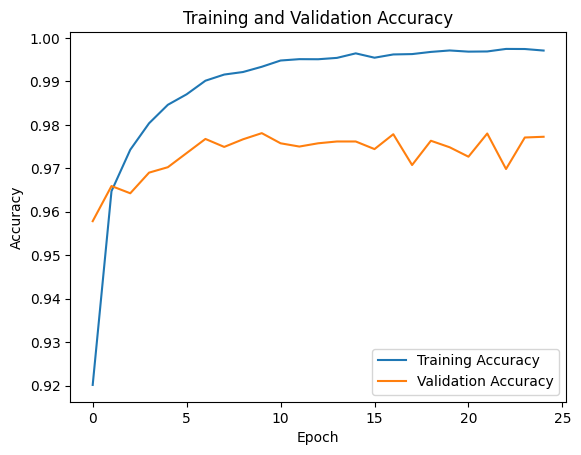

In [18]:

# Plot the training and validation accuracy over epochs to visualize learning progress
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.title('Training and Validation Accuracy')  # Add a title to the plot
plt.legend()  # Display the legend to distinguish lines
plt.show()  # Show the plot


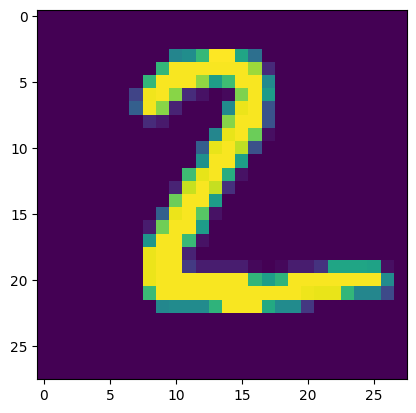

In [19]:
# Display the second image from the testing data to visualize its content
plt.imshow(X_test[1])  # Show the 2nd image in the testing set

In [20]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)
# Predict the digit represented in the second image and display the predicted class
predicted_class = model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)  # Reshape image and get predicted class
print("Predicted digit:", predicted_class[0])  # Print the predicted digit


1/1 [==============================] - 0s 21ms/step
Predicted digit: 2
